# 01 - Feature Selection and Dimentionality Reduction
** Ecole Centrale Nantes **

** Diana Mateus **



PARTICIPANTS: Yassine JAMOUD, Samy Haffoudhi

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## 1. Feature Selection


### 1.1 Linear Regression

**a) Run the code to create a toy dataset**. The dataset has 100 points each described by three features $x_1$, $x_2$ and $x_3$. The target value $y$ is continuous and is linearly generated from the three variables (and noise). Notice how the three variables are created.

**b)** **Training a linear regression model** Use the scikit learn in-built functions for fiting a linear model to the created dataset 

``model = LinearRegression()``

``model.fit(X,Y)``

The goal is to automatically estimate the parameters $w_1$, $w_2$ and $w_3$ of the linear model from the input datamatrix $\mathbb{X}$ and the target values ${y}$. 

Look at the documentation of the ``LinearRegression`` function to recover the estimated values of the intercept  (ordonnée à l'origine) $b$ and coefficient $w_1$, $w_2$, $w_3$ parameters.

**BONUS** Alternatively use the Ordinary Least Squares analytical solution to recover the model parameters

**c)** **Evaluating the target predictions** 
Use the ``model.predict`` function to estimate the predictions $y_{hat}$ for the training dataset $X$.

- Plot $y$ vs. $y_{hat}$
- Compute the mean squared error and the r2 variance error between the estimated and the ground truth outputs. 
- Describe your findings

**d)** **Comparing the ground truth vs the estimated model parameters** 
- Compare the values of the original parameters to the estimated ones. Are the estimated values for the coefficients $w_1$, $w_2$, $w_3$ and the intercept $b$ close to the original model?
- What can you say about the contribution of each input feature to the output?
- Explain why do we get such results? 
- How can we improve the interpretability of the weights? at what cost?

In [2]:
#a) Create dataset 
#Check another way to create correlated data at the end of the notebook

from sklearn.linear_model import LinearRegression

size = 100
np.random.seed(seed=5)
 
X_seed = np.random.normal(0, 1, size) 
X1 = X_seed + np.random.normal(0, .1, size)
X2 = X_seed + np.random.normal(0, .01, size)
X3 = X_seed + np.random.normal(0, .001, size)
X = np.array([X1, X2, X3]).T

intercept = 10+np.random.normal(0,1, size).reshape((size,1))

W = np.ones((3,1))

#Y = X1 + X2 + X3 + noisy10
Y = np.matmul(X,W)+ intercept

print('Shape of X',np.shape(X))
print('Shape of W', np.shape(W))
print('Shape of Y', np.shape(Y))

Shape of X (100, 3)
Shape of W (3, 1)
Shape of Y (100, 1)


In [3]:
#b) Fitting a Linear Regression Model
model = LinearRegression()
model.fit(X, Y)
estimated_coeffs = model.coef_
estimated_intercept = model.intercept_

Mean squared error: 0.86
Variance score: 0.89


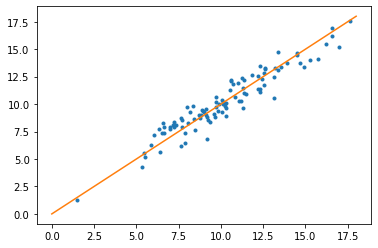

In [4]:
#c) Plot y against y*

Yhat = model.predict(X)

plt.plot(Y, Yhat, '.')
plt.plot([0, 18], [0, 18])

from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Yhat, Y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Yhat, Y))

plt.show()

In [5]:
print(f"Original: w1 = {W[0, 0]}, w2 = {W[1, 0]}, w3 = {W[2, 0]}")
print(f"Estimated: w1 = {estimated_coeffs[0, 0]}, w2 = {estimated_coeffs[0, 1]}, w3 = {estimated_coeffs[0, 2]}")
print(f'Estimated: intercept = {estimated_intercept[0]}')

Original: w1 = 1.0, w2 = 1.0, w3 = 1.0
Estimated: w1 = -1.239397246503829, w2 = 7.135407190700107, w3 = -2.8473016976487724
Estimated: intercept = 9.967246119489113


### 1.2 Ridge and Lasso Regression

a) Using the data from above repeat the regression but fitting this time:
- a ridge model ```Ridge()```
- a Lasso model ```Lasso()```
- an Elastic Net model ```ElasticNet()```

b) Compare the **prediction errors** (MSE, r2), among the three regularized models.  Use a fixed value of the regularization coefficient ```alpha=0.3``` (alpha corresponds to $\lambda$ in the lectures). Comment on the results.

c) Plot the estimated coefficients against different values of ``alpha``($\lambda$). Use the following values 
``` python
alphas = np.logspace(-6, 2, 200)
```
d) **Coefficient estimate error** Mesure the MSE error between the original and estimated parameters for each case. Plot the coefficient error vs alpha.

e) **Prediction error** Mesure the MSE error between the ground truth and predicted target for each case. Plot the target error vs alpha.

f) Conclude.

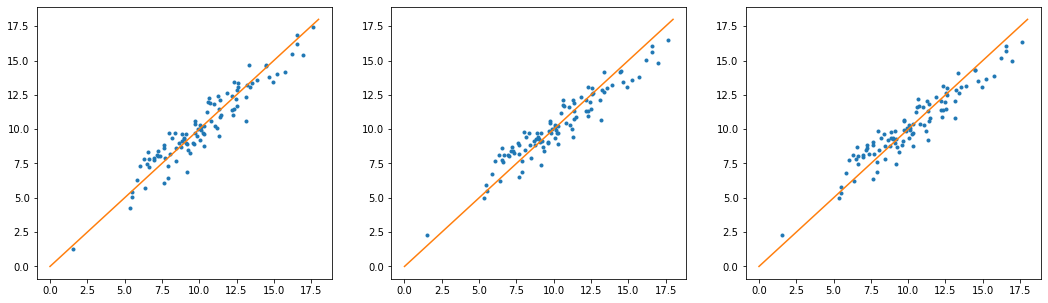

In [6]:
#a) Ridge Lasso ElasticNet
from sklearn.linear_model import Lasso, Ridge, ElasticNet

fig=plt.figure(figsize=(18, 5))

alpha = 0.3

model = Ridge(alpha)
model.fit(X, Y)

Yhat_ridge = model.predict(X)

plt.subplot(1, 3, 1)
plt.plot(Y, Yhat_ridge, '.')
plt.plot([0, 18], [0, 18])

model = Lasso(alpha)
model.fit(X, Y)

Yhat_lasso = model.predict(X)

plt.subplot(1, 3, 2)
plt.plot(Y, Yhat_lasso, '.')
plt.plot([0, 18], [0, 18])

model = ElasticNet(alpha)
model.fit(X, Y)

Yhat_enet = model.predict(X)

plt.subplot(1, 3, 3)
plt.plot(Y, Yhat_enet, '.')
plt.plot([0, 18], [0, 18])

plt.show()

In [7]:
#b) Errors

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Yhat, Y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f\n' % r2_score(Yhat, Y))

# The mean squared error
print("Mean squared error ridge: %.2f"% mean_squared_error(Yhat_ridge, Y))
# Explained variance score: 1 is perfect prediction
print('Variance score ridge: %.2f\n' % r2_score(Yhat_ridge, Y))

# The mean squared error
print("Mean squared error lasso: %.2f"% mean_squared_error(Yhat_lasso, Y))
# Explained variance score: 1 is perfect prediction
print('Variance score lasso: %.2f\n' % r2_score(Yhat_lasso, Y))

# The mean squared error
print("Mean squared error enet: %.2f"% mean_squared_error(Yhat_enet, Y))
# Explained variance score: 1 is perfect prediction
print('Variance score enet: %.2f\n' % r2_score(Yhat_enet, Y))

Mean squared error: 0.86
Variance score: 0.89

Mean squared error ridge: 0.87
Variance score ridge: 0.89

Mean squared error lasso: 0.98
Variance score lasso: 0.84

Mean squared error enet: 1.00
Variance score enet: 0.84



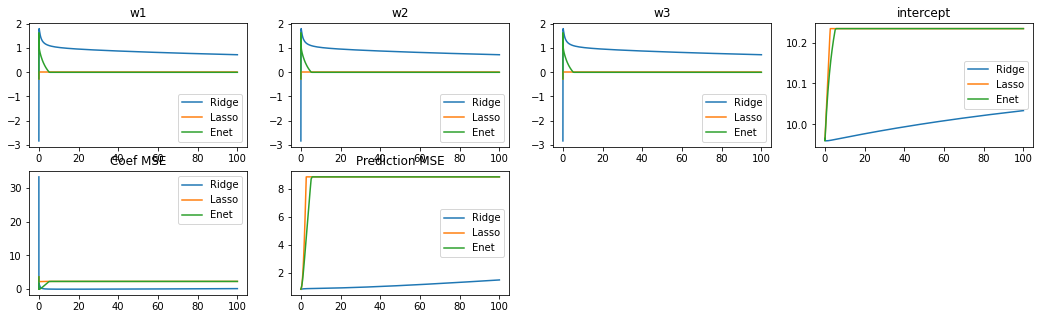

In [8]:
#c-d-e)Plot the estimated coefficients and errors against different values of alpha

fig=plt.figure(figsize=(18, 5))

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

alphas = np.logspace(-6, 2, 200)
w1_values = w2_values = w3_values = np.zeros((200,3))
intercept_values = np.zeros((200,3))
prediction_errors = np.zeros((200,3))

W_estimad = np.array([], dtype='float64')

for i, alpha in enumerate(alphas):
    model = Ridge(alpha)
    model.fit(X, Y)
    w1_ridge, w2_ridge, w3_ridge = model.coef_[0]
    intercept_ridge = model.intercept_
    Yhat_ridge = model.predict(X)
    prediction_errors_ridge = mean_squared_error(Yhat_ridge, Y)

    model = Lasso(alpha)
    model.fit(X, Y)
    w1_lasso, w2_lasso, w3_lasso = model.coef_
    intercept_lasso = model.intercept_
    Yhat_lasso = model.predict(X)
    prediction_errors_lasso = mean_squared_error(Yhat_lasso, Y)

    model = ElasticNet(alpha)
    model.fit(X, Y)
    w1_enet, w2_enet, w3_enet = model.coef_
    intercept_enet = model.intercept_
    Yhat_enet = model.predict(X)
    prediction_errors_enet = mean_squared_error(Yhat_enet, Y)
    
    w1_values[i, :] = [w1_ridge, w1_lasso, w1_enet]
    w2_values[i, :] = [w2_ridge, w2_lasso, w2_enet]
    w3_values[i, :] = [w3_ridge, w3_lasso, w3_enet]
    
    intercept_values[i, :] = [intercept_ridge, intercept_lasso, intercept_enet]
    
    prediction_errors[i, :] = [prediction_errors_ridge, prediction_errors_lasso, prediction_errors_enet]
    
coef_errors = 1/4 * (w1_values-1)**2 + (w2_values-1)**2 + (w3_values-1)**2 + (intercept_values-10)** 2
    
plt.subplot(2,4,1)
plt.plot(alphas, w1_values[:, 0])
plt.plot(alphas, w1_values[:, 1])
plt.plot(alphas, w1_values[:, 2])
plt.legend(["Ridge", "Lasso", "Enet"])
plt.title('w1')
plt.subplot(2,4,2)
plt.plot(alphas, w2_values[:, 0])
plt.plot(alphas, w2_values[:, 1])
plt.plot(alphas, w2_values[:, 2])
plt.legend(["Ridge", "Lasso", "Enet"])
plt.title('w2')
plt.subplot(2,4,3)
plt.plot(alphas, w3_values[:, 0])
plt.plot(alphas, w3_values[:, 1])
plt.plot(alphas, w3_values[:, 2])
plt.legend(["Ridge", "Lasso", "Enet"])
plt.title('w3')
plt.subplot(2,4,4)
plt.plot(alphas, intercept_values[:, 0])
plt.plot(alphas, intercept_values[:, 1])
plt.plot(alphas, intercept_values[:, 2])
plt.legend(["Ridge", "Lasso", "Enet"])
plt.title('intercept')
plt.subplot(2,4,5)
plt.plot(alphas, coef_errors[:, 0])
plt.plot(alphas, coef_errors[:, 1])
plt.plot(alphas, coef_errors[:, 2])
plt.legend(["Ridge", "Lasso", "Enet"])
plt.title('Coef MSE')
plt.subplot(2,4,6)
plt.plot(alphas, prediction_errors[:, 0])
plt.plot(alphas, prediction_errors[:, 1])
plt.plot(alphas, prediction_errors[:, 2])
plt.legend(["Ridge", "Lasso", "Enet"])
plt.title('Prediction MSE')

plt.plot()
plt.show()

### 1.3 Feature selection  for Heart Disease
The dataset ```filtHeartDataSet``` is a filtered version and subset of Heart dataset which contains a binary outcome labels for 299 patients  with chest pain. 
- A positive target value indicates the presence of heart disease based on an angiographic test, 
- while a negative target value means no heart disease. 

The data matrix dataMatrix contains 13 features (measurements) including Age, Sex, Chol (a cholesterol measurement), and other heart and lung function measurements.

See the following link for the full description
http://archive.ics.uci.edu/ml/datasets/Heart+Disease

**Goal**: Find and retain only the most relevant features to predict heart disease

**a)** Run the given code to load and prepare the Heart Disease dataset.

**b)** Compute the correlation of the target to every value and between variables **Hint** use ``np.corr`` on the matrix containing both the target values and the variables.

**c)** Run the skitlearn example for univariate feature selection with  as criteria.

**d)** Modify the example to do feature selection on the Heart Disease dataset. Try the ``f-test`` and ``mutual information`` univariate tests for classification. 

**e)** Compare the results of d) against those of Lasso and Elastic Net regression.

**f)**  What are the most predictive variables to be preserved? Recover the actual name of the variables in each case.How many variables should we keep?

**g)** What type of variable selection methods are the univariate test and Lasso and Elastic Net? Which type of method is missing?

In [9]:
#a) Load and prepare data
#The variables of interest are Xall and yall
#The final ordered list of variable names is found in new_columns_2

import pandas as pd
# Create Pandas dataframe.
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df0     = pd.read_table("heart_disease_all14.csv", sep=',', header=None, names=columns)
# Convert categorical variables with more than two values into dummy variables.
# Note that variable ca is discrete but not categorical, so we don't convert it.
df      = df0.copy()
dummies = pd.get_dummies(df["cp"],prefix="cp")
df      = df.join(dummies)
del df["cp"]
del df["cp_4.0"]
df      = df.rename(columns = {"cp_1.0":"cp_1","cp_2.0":"cp_2","cp_3.0":"cp_3"})

dummies = pd.get_dummies(df["restecg"],prefix="recg")
df      = df.join(dummies)
del df["restecg"]
del df["recg_0.0"]
df      = df.rename(columns = {"recg_1.0":"recg_1","recg_2.0":"recg_2"})

dummies = pd.get_dummies(df["slope"],prefix="slope")
df      = df.join(dummies)
del df["slope"]
del df["slope_2.0"]
df      = df.rename(columns = {"slope_1.0":"slope_1","slope_3.0":"slope_3"})

dummies = pd.get_dummies(df["thal"],prefix="thal")
df      = df.join(dummies)
del df["thal"]
del df["thal_3.0"]
df      = df.rename(columns = {"thal_6.0":"thal_6","thal_7.0":"thal_7"})

# Replace response variable values and rename
df["num"].replace(to_replace=[1,2,3,4],value=1,inplace=True)
df      = df.rename(columns = {"num":"hd"})

# New list of column labels after the above operations
new_columns_1 = ["age", "sex", "restbp", "chol", "fbs", "thalach", 
                 "exang", "oldpeak", "ca", "hd", "cp_1", "cp_2",
                 "cp_3", "recg_1", "recg_2", "slope_1", "slope_3",
                 "thal_6", "thal_7"]

print ('\nNumber of patients in dataframe: %i, with disease: %i, without disease: %i\n' \
      % (len(df.index),len(df[df.hd==1].index),len(df[df.hd==0].index)))

#print (df.head()) # UNCOMMENT FOR MORE INFO ON THE DATASET
#print (df.describe())# UNCOMMENT FOR MORE INFO ON THE DATASET

# Standardize the dataframe
stdcols = ["age","restbp","chol","thalach","oldpeak"]
nrmcols = ["ca"]
stddf   = df.copy()
stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/x.std())
stddf[nrmcols] = stddf[nrmcols].apply(lambda x: (x-x.mean())/(x.max()-x.min()))

new_columns_2 = new_columns_1[:9] + new_columns_1[10:]
new_columns_2.insert(0,new_columns_1[9])
stddf = stddf.reindex(columns=new_columns_2)

# Convert dataframe into numpy arrays to be used by classifiers
yall = stddf["hd"] # the heart disease column alone
Xall = stddf[new_columns_2[1:]].values # the potentially predictive variables
yXall = stddf.values # y and X combined in the same matrix, with y in the first column

print("Number of available features:", Xall.shape[1])
stddf[new_columns_2[1:]].head() #only the variables

print(new_columns_2)


Number of patients in dataframe: 299, with disease: 139, without disease: 160

Number of available features: 18
['hd', 'age', 'sex', 'restbp', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_1', 'cp_2', 'cp_3', 'recg_1', 'recg_2', 'slope_1', 'slope_3', 'thal_6', 'thal_7']


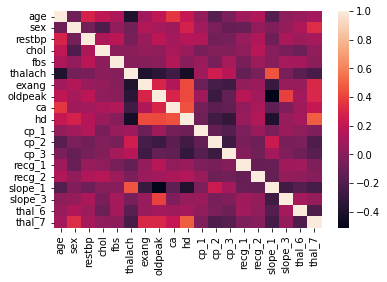

In [10]:
# b) Correlation matrix

import seaborn as sns

sns.heatmap(df.corr())

plt.show()

In [11]:
# b)  Scikit learn example for monovariate feature selection on iris dataset

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

iris = load_iris()
Xiris, yiris = iris.data, iris.target
print('Shape of the input matrix', X.shape)

model = SelectKBest(f_classif, k=2)
model.fit(Xiris,yiris)
mask = model.get_support()
print('Selected best variables',mask)

Xiris_new=Xiris[:,mask==True]
print('Shape after variable selection',Xiris_new.shape)

Shape of the input matrix (100, 3)
Selected best variables [False False  True  True]
Shape after variable selection (150, 2)


In [12]:
# d) Run univariate feature selection on the heart disease dataset

model = SelectKBest(f_classif, k=2)
model.fit(Xall, yall)
mask = model.get_support()
# Xall_f = Xall[:,mask==True]
print("Selected best variables", mask)

model = SelectKBest(mutual_info_classif, k=2)
model.fit(Xall, yall)
mask = model.get_support()
# Xall_mutual_info = Xall[:,mask==True]
print("Selected best variables", mask)

Selected best variables [False False False False False False False False  True False False False
 False False False False False  True]
Selected best variables [False False False False False False False False  True False False False
 False False False False False  True]


In [13]:
# e) Lasso and Enet 

from sklearn.feature_selection import SelectFromModel

alphas = np.logspace(-4, 0, 200)

for alpha in alphas:
    model = SelectFromModel(Lasso(alpha), threshold='mean')
    model.fit(Xall, yall)
    mask = model.get_support()
    print("alpha = ", alpha)
    print("Lasso Selected best variables", mask)
    
    model = SelectFromModel(ElasticNet(alpha), threshold='mean')
    model.fit(Xall, yall)
    mask = model.get_support()
    print("Enet Selected best variables", mask, '\n')

alpha =  0.0001
Lasso Selected best variables [False  True False False False False False False  True  True  True  True
 False False  True False False  True]
Enet Selected best variables [False  True False False False False False False  True  True  True  True
 False False  True False False  True] 

alpha =  0.00010473708979594497
Lasso Selected best variables [False  True False False False False False False  True  True  True  True
 False False  True False False  True]
Enet Selected best variables [False  True False False False False False False  True  True  True  True
 False False  True False False  True] 

alpha =  0.00010969857978923841
Lasso Selected best variables [False  True False False False False False False  True  True  True  True
 False False  True False False  True]
Enet Selected best variables [False  True False False False False False False  True  True  True  True
 False False  True False False  True] 

alpha =  0.00011489510001873086
Lasso Selected best variables [False  T

alpha =  0.0070671812739274914
Lasso Selected best variables [False  True False False False False  True False  True  True  True  True
 False False  True False False  True]
Enet Selected best variables [False  True False False False False  True False  True  True  True  True
 False False  True False False  True] 

alpha =  0.007401959996915644
Lasso Selected best variables [False  True False False False False  True False  True  True False  True
 False False  True False False  True]
Enet Selected best variables [False  True False False False False  True False  True  True  True  True
 False False  True False False  True] 

alpha =  0.007752597488629464
Lasso Selected best variables [False  True False False False False  True False  True  True False  True
 False False  True False False  True]
Enet Selected best variables [False  True False False False False  True False  True  True  True  True
 False False  True False False  True] 

alpha =  0.008119844993184008
Lasso Selected best variables 

In [14]:
# f) 

model = SelectKBest(f_classif, k=2)
model.fit(Xall, yall)
mask_f = model.get_support()

model = SelectKBest(mutual_info_classif, k=2)
model.fit(Xall, yall)
mask_mutual = model.get_support()

def getName(l, mask):
    return [l[i] for i in range(len(l)) if mask[i]]

print('f_val', getName(new_columns_2[1:], mask_f))
print('mutual_info', getName(new_columns_2[1:], mask_mutual))

f_val ['ca', 'thal_7']
mutual_info ['oldpeak', 'thal_7']


* La méthode "univariate test" correspond à une approche par filtrage
* Les méthodes reposant sur la régression Lasso et Elastic Net sont correspondent à des "embedded approaches"
* Il reste alors à tester des méthodes relevant d'une "wrapper approach"

## 2. Principal Component Analysis

### 2.1. PCA demo with point cloud
Run and analyse the demo code

Explained variance [0.7625315 0.0184779]
PCA components
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


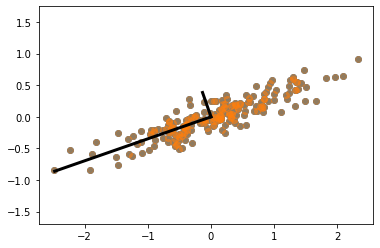

In [48]:
from sklearn.decomposition import PCA

#Generating the data
np.random.seed(1)
X = np.matmul(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

#Apply PCA
pca = PCA(n_components=2)
pca.fit(X)
print('Explained variance', pca.explained_variance_)
print('PCA components\n',pca.components_)

#Plot principal components
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');
plt.show()

### 2.2 Own PCA implementation 
Make your own implementation of the PCA algorithm and compare your results with the above

To implement PCA follow the steps bellow
- Demean the data (mean=0).
- Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix (Equivalently do Singular Vector Decomposition on the data Matrix). 
``` np.linalg.eig(cov_mat)```
- Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues. Remember k is the number of dimensions of the new feature subspace (k ≤ D) (Check first if already ordered)
- Construct the projection matrix T from the selected k eigenvectors.
- Transform the original dataset X via T to obtain a k dimensional feature subspace Z

Your results should be equivalent to the above, explain any difference.

[0.7625315 0.0184779]


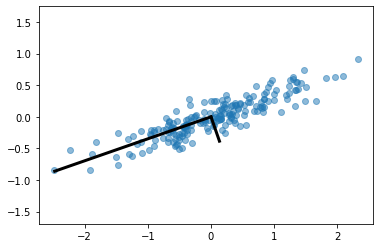

In [55]:
def pca(X, k):
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean
    C = np.cov(X_centered, rowvar=False)
    w, v = np.linalg.eigh(C)
    sort_index = np.argsort(w[::-1])
    w_sorted, v_sorted = w[sort_index], v[:, sort_index]
    v_subset, w_subset = v_sorted[:,:k], w_sorted[:k]
    X_reduced = X_centered @ v_subset.T
        
    return (X_reduced, v_subset.T, w_subset)

_, components, explained_variance = pca(X, 2)

print(explained_variance)

plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(explained_variance, components):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

plt.show()

### 2.3 PCA on digits dataset

Apply PCA (yours or the in-built version) on the load_digits dataset

**a)** Visualize some of the images for each target value.

**b)** Apply PCA to reduce the dimensionality of each vectorized image (1,64) to just 2 dimensions. Plot the projected dataset with a scatter plot in two dimensions, using the labels to color. Comment.

Hint for plotting:
``` python
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', 
            alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();
```

**c)** Visualize the cumulative explained variance vs the the number of retained dimensions

**d)** For 3 different input images (from different target values) 
- recostruct and show the full 8x8 image from its 1x2 low-dimensional representation.
Hint: Use ```pca.inverse_transform```, 

- show how the aspect of the reconstructed image changes when increasing the number of retained dimensions.

**e)** what does the inverse_transformation function do?


Original size (1797, 64)


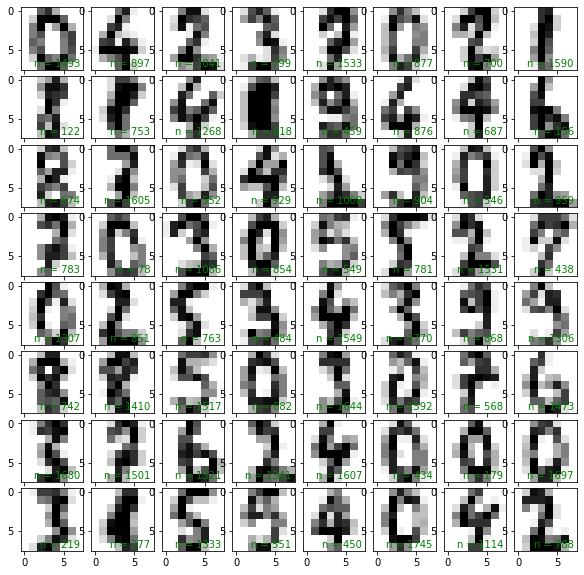

In [62]:
#a) Load and visualize data
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

print('Original size',X.shape)

# a) Show some of the images
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
    r = np.random.randint(1,X.shape[0])
    im = X[r,:]
    #print(im.shape)
    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(r), ha='right',
            transform=ax.transAxes, color='green')

plt.show()



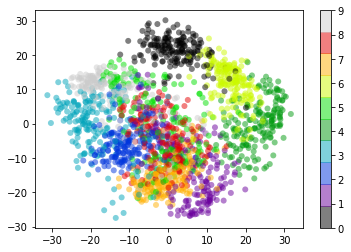

In [63]:
#b) 2D projection of the images

pca = PCA(n_components=2)
pca.fit(X)

# print('Explained variance', pca.explained_variance_)
# print('PCA components\n',pca.components_)

Xproj = pca.transform(X)

plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', 
            alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

plt.show()

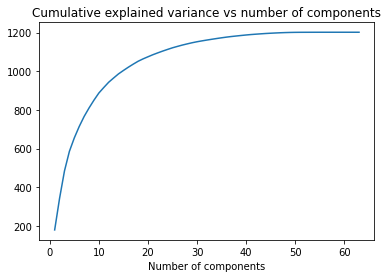

In [65]:
#c) Cummulative explained variance

M, N = X.shape
cumulative_explained_variances = []

for d in range(1, N):
    pca = PCA(n_components=d)
    pca.fit(X)
    cumulative_explained_variances.append(np.sum(pca.explained_variance_))
    
plt.plot(range(1, N), cumulative_explained_variances)
plt.xlabel("Number of components")
plt.title("Cumulative explained variance vs number of components")
plt.show()

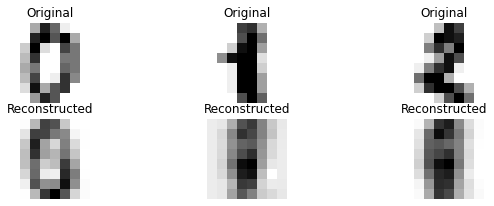

In [96]:
#d) Inverse transform for reconstruction (from low to high dimensional representation)

fig=plt.figure(figsize=(10, 5))

pca = PCA(n_components=2)
pca.fit(X)
Xproj = pca.transform(X)

Xorig = pca.inverse_transform(Xproj)

plt.subplot(3,3,1)
plt.axis('off')
plt.title('Original')
plt.imshow(X[0,:].reshape((8,8)), cmap='binary')
plt.subplot(3,3,2)
plt.axis('off')
plt.title('Original')
plt.imshow(X[1,:].reshape((8,8)), cmap='binary')
plt.subplot(3,3,3)
plt.axis('off')
plt.title('Original')
plt.imshow(X[2,:].reshape((8,8)), cmap='binary')
plt.subplot(3,3,4)
plt.axis('off')
plt.title('Reconstructed')
plt.imshow(Xorig[0,:].reshape((8,8)), cmap='binary')
plt.subplot(3,3,5)
plt.axis('off')
plt.title('Reconstructed')
plt.imshow(Xorig[1,:].reshape((8,8)), cmap='binary')
plt.subplot(3,3,6)
plt.axis('off')
plt.title('Reconstructed')
plt.imshow(Xorig[2,:].reshape((8,8)), cmap='binary')

plt.show()

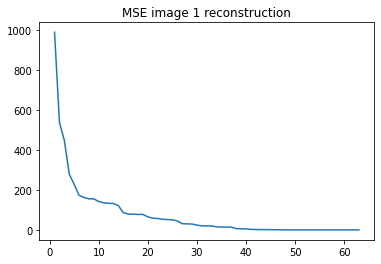

In [100]:
err = []

for d in range(1, 64):
    pca = PCA(n_components=d)
    pca.fit(X)
    Xproj = pca.transform(X)
    Xorig = pca.inverse_transform(Xproj)
    err.append(sum((X[0,:]-Xorig[0,:])**2))

plt.plot(range(1,64), err)
plt.title("MSE image 1 reconstruction")
    
plt.show()